#### Telco Classification Analysis
**Artifact: Working Jupyter Notebook**

Presenter: Mijail Q. Mariano

Thursday, July 14th 2022

----


**Required Libraries & Modules**

In [19]:
# importing libraries
import pandas as pd
pd.set_option('display.max_columns', None)
from skimpy import clean_columns
import numpy as np

# visualization modules:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams["figure.dpi"] = 300

# created data acquisition/preparation modules
from acquire import get_telco_data
import prepare 
from prepare import clean_telco_data, train_validate_test_split, model_features, dummy_columns

import env
from env import user, password, host, get_connection

**<u>Project Objective(s): Identify Drivers of Customer Churn</u>** 

**[ ]** Use visualizations and statistical tests to identify potential influencers of customer **churn**

**[ ]** Use statistically significant features to design a predictive model to identify customers likely to churn

**[ ]** Summarize findings and offer intervention recommendations that can help customers from ending their service  

<u>*The term "churn" in this analysis is defined as both:*</u>

    1. Customers who have elected to end their service commitments with the telco company - as indicated in the "telco" dataset (past-tense) 

    2.  Under prescribed conditions, churn will also be defined as predictions of customers who may end their services with the telco company at some future date (future-tense)

----
**[In Brief]** Data Insights from Storytelling Module

Month-to-Month customers churn at higher rates than 1 & 2 year contract customers

Fiber Optic customers are more likely to churn than DSL & No Internet Customers

Customers WITHOUT dependents churn more than customers WITH dependents

Customers who pay/paid with Electronic-checks appear more likely to churn than customers who pay with other monthly payment methods

    - Mailed Check
    - Bank Transfer (automatic payment)
    - Credit Card (automatic payment)

----
**[Initial Hypotheses]**

```Internet Options```

*Is there a relationship between ```internet``` options and whether or not a customer churns?*

* Internet account customers are disastisfied with the current internet options. Fiber Optic specifically appears to be incompatibale with other market rates or speeds. Since Fiber Optic is typically a better performing option over DSL, customers are reluctant to give DSL a try and therefore terminate services entirely with the company. 

```Streaming Movies Option```

*Is there a relationship between the ```streaming movies``` option and whether or not a customer churns?*

* Customers who regularly rely on streaming movies as their main source of entertainment - may be more inclined to remain with the Telco company than those who dont stream movies. Additionally, there may be exclusive movie streaming packages only found with the Telco company which makes churning to another competitor less attractive to customers.

```Tech Support Option```

*Is there a relationship between the ```tech support``` option and whether or not a customer churns?*

* Internet service customers who opt for the tech support option are less likely to churn than those without. Since tech support can be a key facilitator in helping customers during difficult times, customers with tech support may see this option as a helpful alternative before making a decision to churn.


```Monthly Payment Options```

*Is there a relationship between ```monthly payment``` options and whether or not a customer churns?*

* Customers who opt to pay their monthly charges via electronic check (E-check) are more likely to churn. This is possibly due to E-checks requiring additional steps such as login into a third-party website and paying additional fees for clearing their payment to Telco.


**<u>Takeaways</u>**

Hypothesis testing during exploration showed that customer churn holds a statistically significant relationship with features such as ```internet_type```, ```tech_support```, ```streaming_movies```, and ```payment_type```.

<center>
<table>
  <thead>
    <tr>
      <th>Data Feature</th>
      <th>Statistical Test</th>
      <th>Degress of Freedom</th>
      <th>P-value</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>internet_type</td>
      <td>ChiSquared</td>
      <td>6</td>
      <td>0.00</td>
    </tr>
    <tr>
      <td>tech_support</td>
      <td>ChiSquared</td>
      <td>6</td>
      <td>0.00</td>
    </tr>
    <tr>
      <td>streaming_movies</td>
      <td>ChiSquared</td>
      <td>6</td>
      <td>0.00</td>
    </tr>
    <tr>
      <td>payment_type</td>
      <td>ChiSquared</td>
      <td>8</td>
      <td>0.00</td>
  </tbody>
</table>
</center>

When examined against churn, these features returned $\chi^2$ (chiSquared) tests with variability significantly different amongst observed frequency and expected frequency. This infers that there is a dependency among these features and customer's decision to churn.

**<u>Recommendations</u>**

1. Work to improve internet speeds and reliability - specifically across Fiber Optic infrastructure as this option appears to have a stronger statistical relationship to customer churn than the DSL option.
   
2. Encourage internet service customers to opt for the tech_support option in order to help remedy real-time internet issues, and/or provide customers an alternative internet option such as DSL in critical moments.

3. Eliminate Electronic Check ("E-Check") as a monthly payment option as this appears to have a relatively strong statistical association to customer churn & higher churn rates than DSL. This is possibly due to customers taking additional steps such as loging into a third-party website to pay their monthly bill and paying an additional fee for clearing the electronic check. 

4. Although streaming movies is very closely associated with whether or not a customer has internet with the company, it's still worth noting that more than 1/3 of all customers have chosen this option. Of which, these customers also churn at less rates than customers who have not chosen to stream movies. 

    - My recommendation here would be to partner with leading film / streaming platforms to create selective releases only with the telco company and adverstise to non-movie streaming customers. By diversifying the movie streaming options, you potentially appeal to more customers. 

----
### ```Data Acquisition & Preparation:```

Telco Dataset: (7043 rows, 24 Features)

Telco Dataset w/Dummy Variables: (7043 rows, 62 columns)

In [20]:
# importing and cleaning telco dataset

df = get_telco_data()
df = clean_telco_data(df)
df = dummy_columns(df)
df.head()

,internet_service_type,payment_type,contract_type,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type_dsl,internet_service_type_fiber_optic,internet_service_type_no_internet_service,payment_type_bank_transfer_automatic,payment_type_credit_card_automatic,payment_type_e_check,payment_type_mailed_check,contract_type_month_to_month,contract_type_one_year,contract_type_two_year,gender_female,gender_male,partner_no,partner_yes,dependents_no,dependents_yes,phone_service_no,phone_service_yes,multiple_lines_no,multiple_lines_no_phone_service,multiple_lines_yes,online_security_no,online_security_no_internet_service,online_security_yes,online_backup_no,online_backup_no_internet_service,online_backup_yes,device_protection_no,device_protection_no_internet_service,device_protection_yes,tech_support_no,tech_support_no_internet_service,tech_support_yes,streaming_tv_no,streaming_tv_no_internet_service,streaming_tv_yes,streaming_movies_no,streaming_movies_no_internet_service,streaming_movies_yes,paperless_billing_no,paperless_billing_yes
0,DSL,Mailed Check,One Year,0002-ORFBO,Female,False,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.60,593.30,False,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1
1,DSL,Mailed Check,Month-to-Month,0003-MKNFE,Male,False,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.90,542.40,False,1,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0
2,DSL,Credit Card (automatic),Month-to-Month,0013-MHZWF,Female,False,No,Yes,9,Yes,No,No,No,No,Yes,Yes,Yes,Yes,69.40,571.45,False,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1
3,DSL,E-Check,Month-to-Month,0015-UOCOJ,Female,True,No,No,7,Yes,No,Yes,No,No,No,No,No,Yes,48.20,340.35,False,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
4,DSL,Mailed Check,Two Year,0016-QLJIS,Female,False,Yes,Yes,65,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.90,False,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1


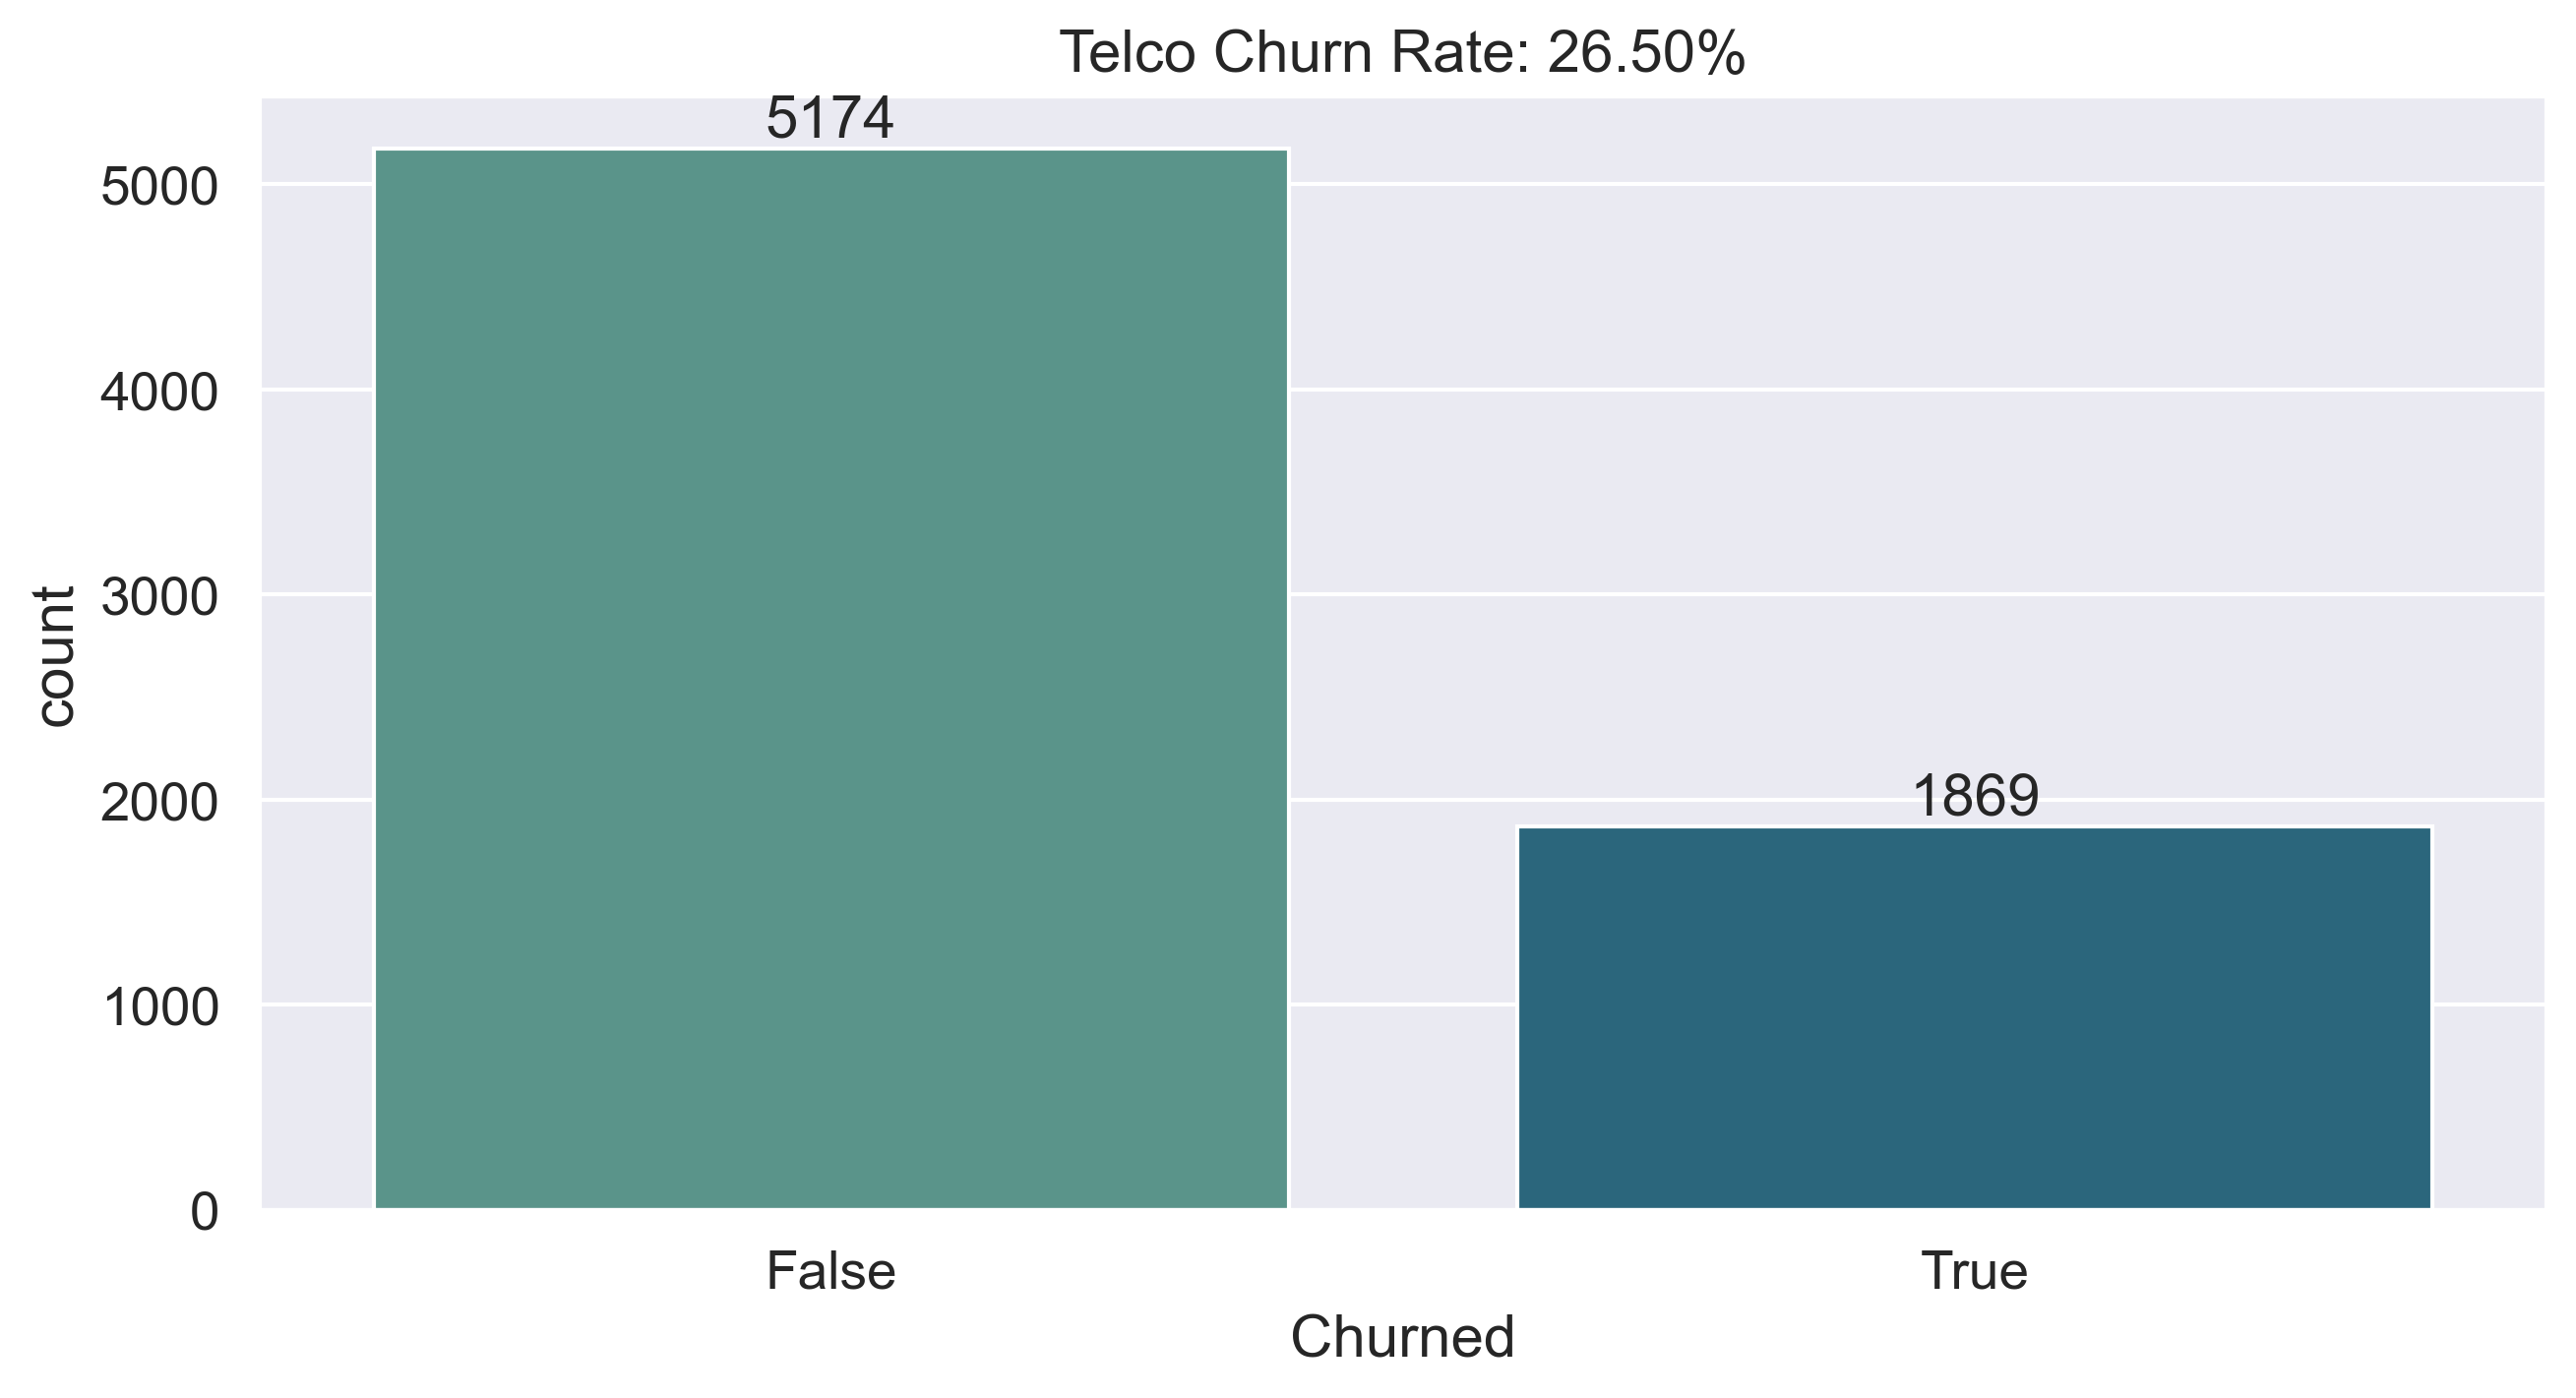

In [21]:
# plotting total number churned and churn % rate
churn_rate = round(df["churn"].mean(), 3)

sns.set(font_scale = 1.2)
ax = sns.countplot(x = "churn", 
    data = df,
    order = df["churn"].value_counts().index,
    palette = "crest")

ax.bar_label(ax.containers[0])

plt.xticks(rotation = 0)
plt.title(f"Telco Churn Rate: {churn_rate:.2%}")
plt.xlabel("Churned")
plt.show()

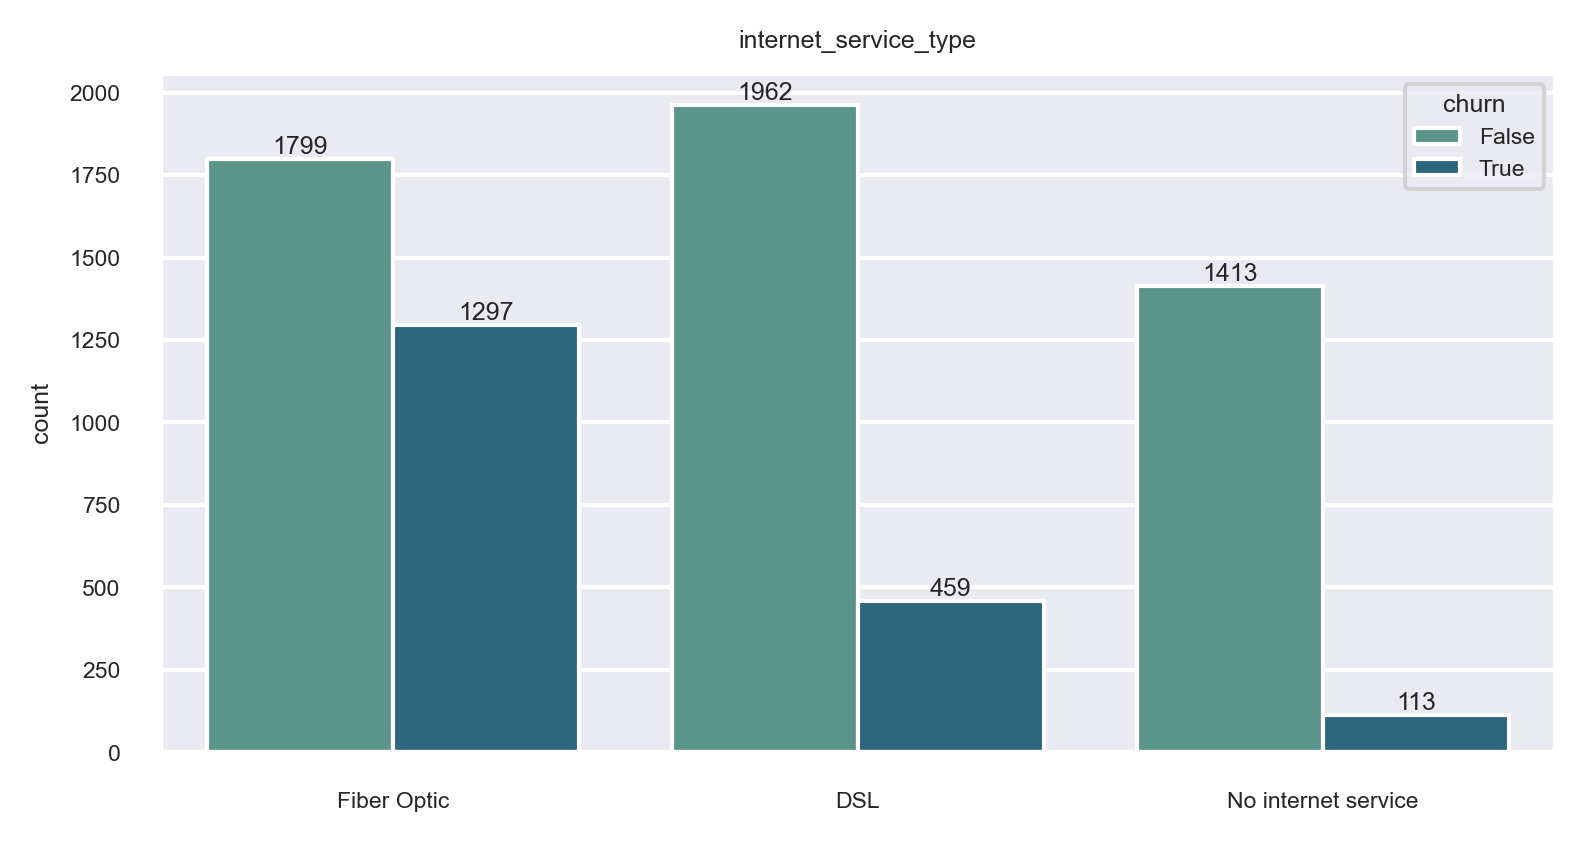

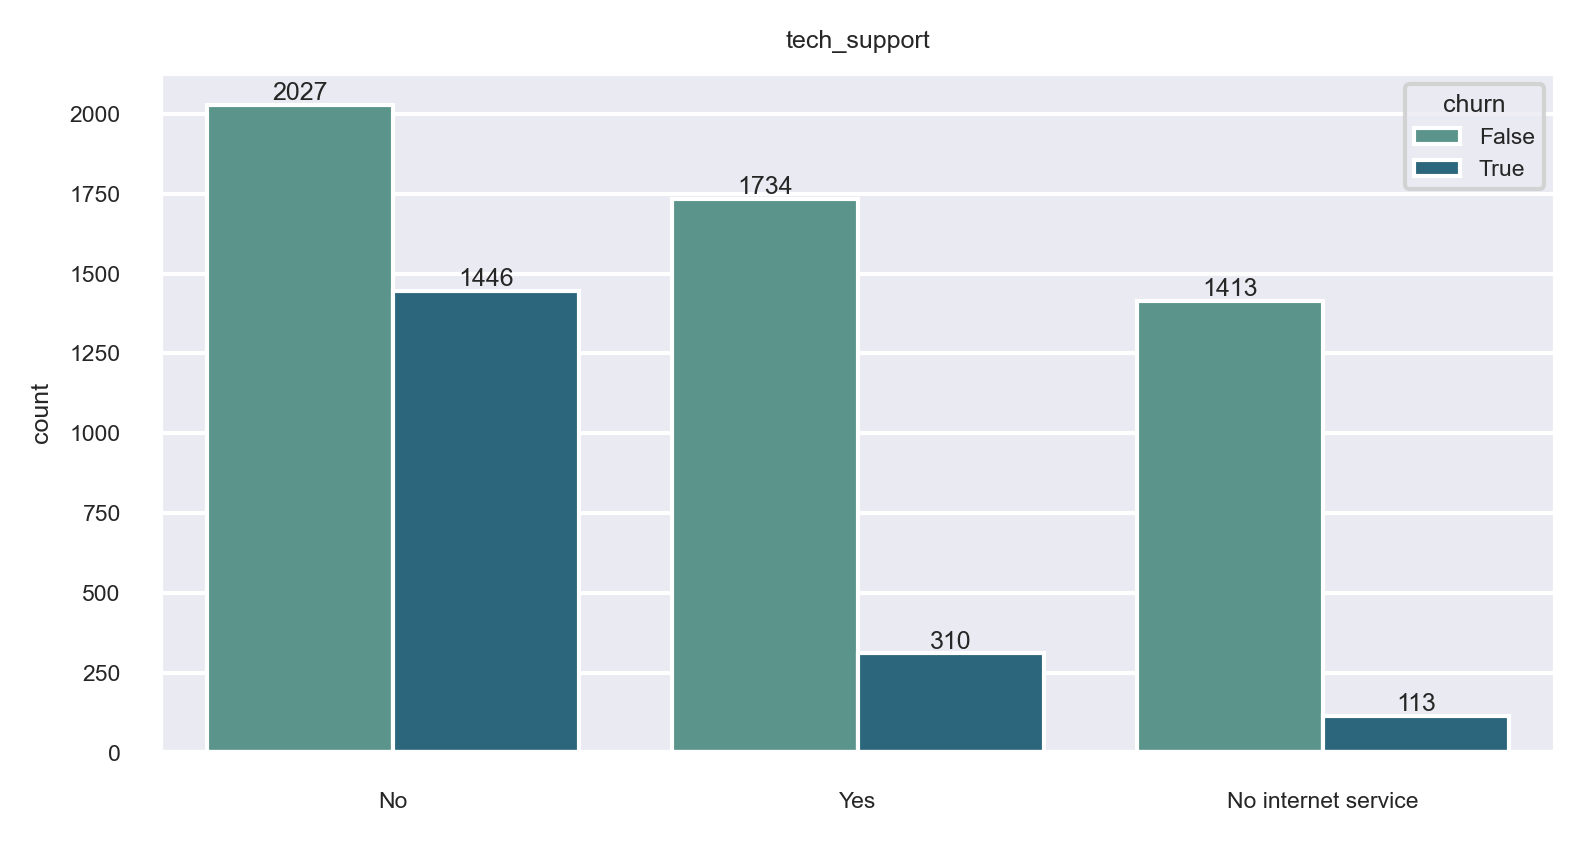

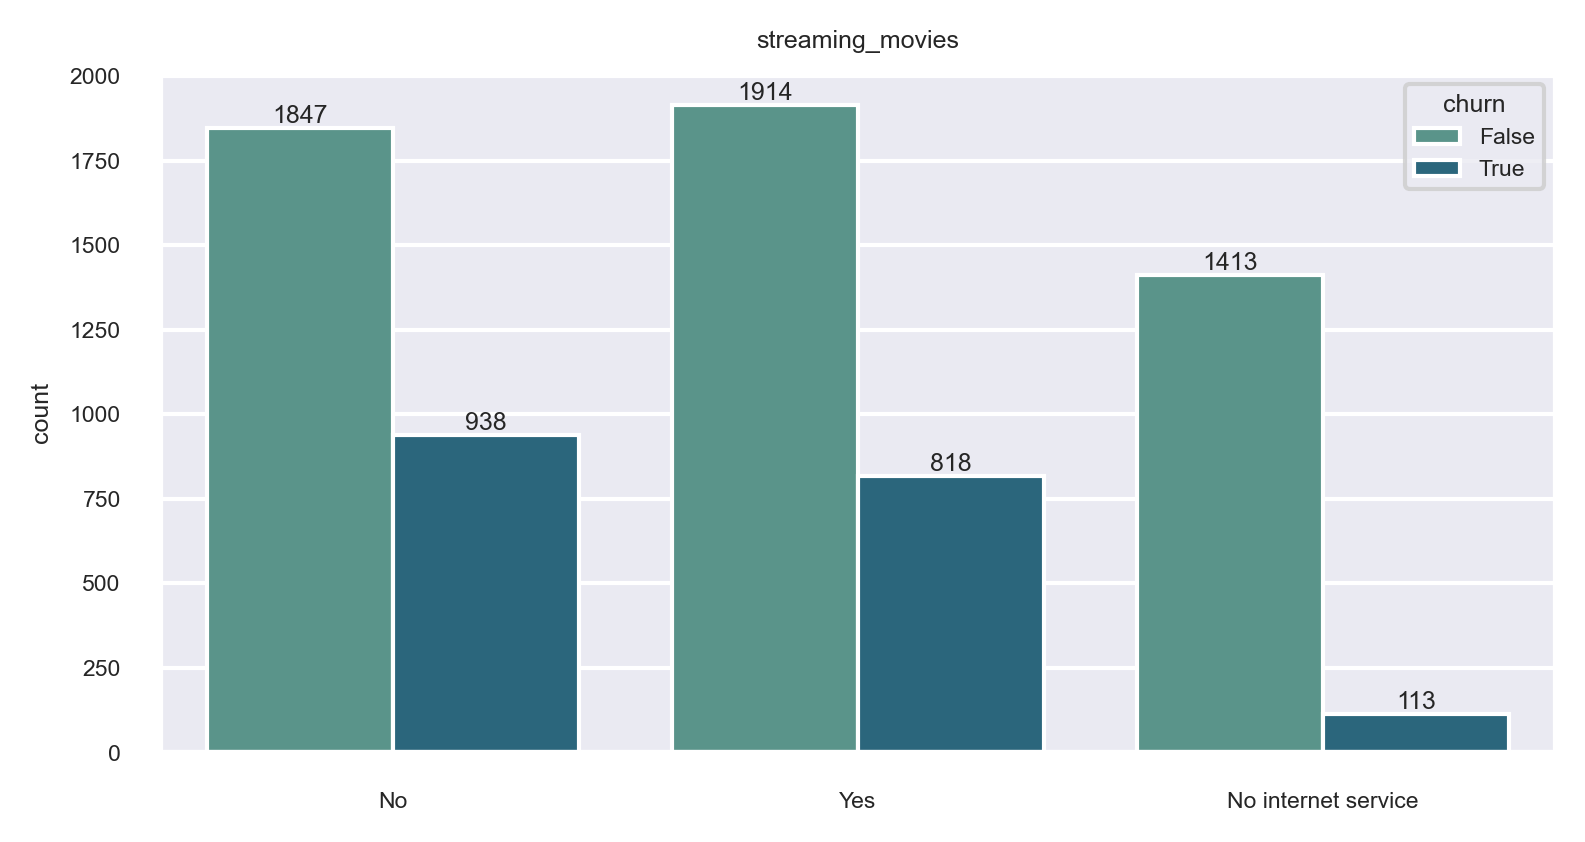

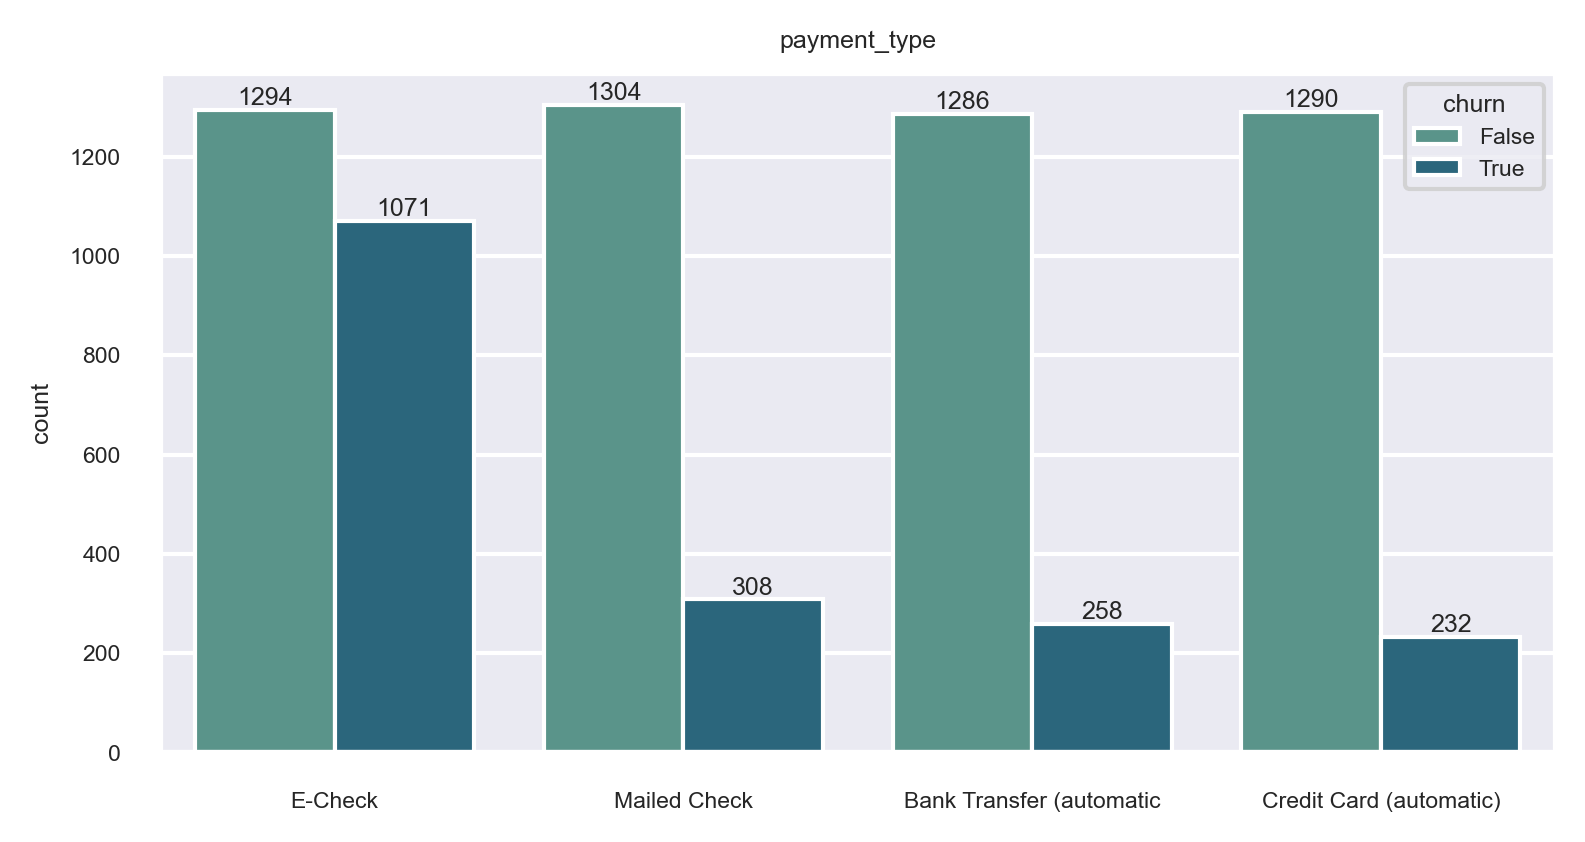

In [22]:
# viewing tested features by churn and non-churn customers

cols = df[["internet_service_type", "tech_support", "streaming_movies", "payment_type"]]
for column in cols:
    plt.figure(figsize=(6, 3))
    sns.set(font_scale = 0.5)
    ax = sns.countplot(x = column, \
                hue = "churn", \
                data = df,
                order = df[column].value_counts().index,
                palette = "crest")
    ax.set(xlabel = None)
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.title(column)
    plt.show()

```Conclusion:``` Based on these plots, I was able to conclude that my initial assumptions of the four (4) identified features were correct. Solely focusing on features not previously explored, we see that internet customers without Telco's ```"tech support"``` option churned at slightly higher rates than those with tech support. Additionally, customers who ```did not stream movies``` also churned significantly more than customers who do.

----
#### <u>Preparing Datasets for Hypothesis Testing</u>

**Dataset Breakdown:**

**Telco DF** split.....80% train / 20% ```TEST```

**Train DF** split.....70% ```TRAIN``` / 30% ```VALIDATE```

In [23]:
train, validate, test = train_validate_test_split(df)

print(f"Train dataset shape: {train.shape}")
print(f"Validate dataset shape: {validate.shape}")
print(f"Test dataset shape: {test.shape}")

Train dataset shape: (3943, 62)
Validate dataset shape: (1691, 62)
Test dataset shape: (1409, 62)


----
### ```Exploration:```

In [24]:
# importing necessary modules for exploration:
import scipy.stats as stats

**Variables**
 
* y = churn (dependent variable)
* X = feature (independent variable)

**Key Questions:**

1. Do the current ```Internet Options``` have an impact on customer churn?
    - Comparing Categorical to Categorical (Chi Squared Test) 
<br><br>
1. Does opting for the ```Tech Support``` option have an effect customer churn?
    
    - Comparing Categorical to Categorical (Chi Squared Test)
<br><br>
3. Does how a customer pay their monthly bill/charges ```(“Payment Type”)``` have an effect on churn?
    
    - Comparing Categorical to Categorical (Chi Squared Test)
<br><br>
4. Does whether or not a customer ```Stream Movies``` impact their decision to churn?
    
    - Comparing Categorical to Categorical (Chi Squared Test)
<br><br>

*(not tested in analysis)*

5. ~~Does whether or not a customer ```Streams TV``` impact their decision to churn?~~
6. ~~Do having ```dependents``` effect a customer's decision to churn or not?~~
7. ~~Does the ```total number of customer account options``` impact churn?~~


----
```Note:``` Since variables and analysis questions are all categorical hypothesis testing required the use of $Chi^2$ testing which subsequently have undelying assumptions which must be true.

$Chi^2$ Assumptions:

* Both y and X variables are independent of one another
* Each feature observation is independent of another and can be summed in the form of a count or frequency
* Features/variables being tested are mutually exclusive of another 
* Each participant contributes to only one cell within the Chi-square table
* (ea. customer cannot be counted twice in a feature...said another way, under ```internet_type``` if a customer has "Fiber Optic", then they cannot also be recorded as "No Internet Service")
* The value of expected cells should be greater than 5